In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
import sklearn.manifold, sklearn.cluster
import rdkit, rdkit.Chem, rdkit.Chem.Draw
from rdkit.Chem.Draw import IPythonConsole
np.random.seed(0)
import warnings
IPythonConsole.ipython_useSVG = True
warnings.filterwarnings('ignore')
sns.set_context('notebook')
sns.set_style('white',  {'xtick.bottom':True, 'ytick.left':True, 'xtick.color': '#666666', 'ytick.color': '#666666',
                        'axes.edgecolor': '#666666', 'axes.linewidth':     0.8 })
color_cycle = ['#1bbc28', '#F06060', '#5C4B51', '#F3B562', '#6e5687']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_cycle) 

In [2]:
soldata = pd.read_csv('curated-solubility-dataset.csv')
soldata.head()
print (len(soldata))

9982


In [3]:
soldata

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


In [5]:


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import datasets, decomposition
from sklearn.manifold import TSNE

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, Descriptors, Descriptors3D, Draw, rdMolDescriptors, Draw, PandasTools
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoSimMat, GetTanimotoDistMat
from rdkit.Chem.Draw import IPythonConsole


from math import pi

%config Completer.use_jedi = False
PandasTools.RenderImagesInAllDataFrames(images=True)

In [6]:
mols = [Chem.MolFromSmiles(smi) for smi in soldata.SMILES]

[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not removing hydrogen atom without neighbors
[13:09:40] WARNING: not r

In [7]:
#bar=progressbar.ProgressBar(max_value=len(soldata))
table=pd.DataFrame()
for i,mol in enumerate(mols):
    #Chem.SanitizeMol(mol)
    soldata.loc[i,'SMILES']=Chem.MolToSmiles(mol)
    soldata.loc[i,'Mol']=mol
    soldata.loc[i,'NumAliphaticCarbocycles']=Descriptors.NumAliphaticCarbocycles(mol)
    soldata.loc[i,'NumAliphaticHeterocycles']=Descriptors.NumAliphaticHeterocycles(mol)
    soldata.loc[i,'NumAliphaticRings']=Descriptors.NumAliphaticRings(mol)
    soldata.loc[i,'NumAromaticCarbocycles']=Descriptors.NumAromaticCarbocycles(mol)
    soldata.loc[i,'NumAromaticHeterocycles']=Descriptors.NumAromaticHeterocycles(mol)
    soldata.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
    #bar.update(i+1)

,Mol,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,...,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumAromaticHeterocycles,FractionCSP3
0,,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127,0.0,1,G1,...,0.0,0.00,158.520601,0.000000e+00,210.377334,0.0,0.0,0.0,0.0,1.000000
1,,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,...,3.0,29.10,75.183563,2.582996e+00,511.229248,0.0,1.0,2.0,0.0,0.000000
2,,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,O=Cc1ccc(Cl)cc1,-2.177078,0.0,1,G1,...,1.0,17.07,58.261134,3.009782e+00,202.661065,0.0,0.0,1.0,0.0,0.000000
3,,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409,0.0,1,G1,...,6.0,120.72,323.755434,2.322963e-07,1964.648666,0.0,0.0,6.0,0.0,0.173913
4,,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065,0.0,1,G1,...,6.0,56.60,183.183268,1.084427e+00,769.899934,0.0,4.0,2.0,0.0,0.520000

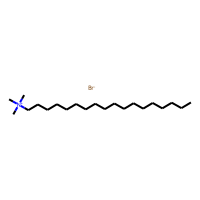
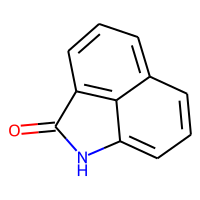
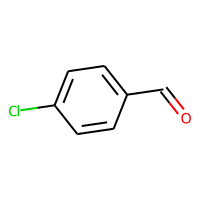
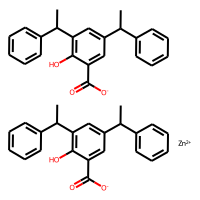
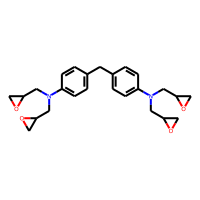

In [8]:
first_column = soldata.pop('Mol')
soldata.insert(0, 'Mol', first_column)
soldata.head(5)

,Mol,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,...,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAromaticCarbocycles,NumAromaticHeterocycles,FractionCSP3
0,,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-],-3.616127,0.000000,1,G1,...,0.0,0.00,158.520601,0.000000e+00,210.377334,0.0,0.0,0.0,0.0,1.000000
1,,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,...,3.0,29.10,75.183563,2.582996e+00,511.229248,0.0,1.0,2.0,0.0,0.000000
2,,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,O=Cc1ccc(Cl)cc1,-2.177078,0.000000,1,G1,...,1.0,17.07,58.261134,3.009782e+00,202.661065,0.0,0.0,1.0,0.0,0.000000
3,,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,CC(c1ccccc1)c1cc(C(=O)[O-])c(O)c(C(C)c2ccccc2)...,-3.924409,0.000000,1,G1,...,6.0,120.72,323.755434,2.322963e-07,1964.648666,0.0,0.0,6.0,0.0,0.173913
4,,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,c1cc(N(CC2CO2)CC2CO2)ccc1Cc1ccc(N(CC2CO2)CC2CO...,-4.662065,0.000000,1,G1,...,6.0,56.60,183.183268,1.084427e+00,769.899934,0.0,4.0,2.0,0.0,0.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,CCCCNc1ccc(C(=O)OCCN(C)C)cc1,-3.010000,0.000000,1,G1,...,1.0,41.57,115.300645,2.394548e+00,374.236893,0.0,0.0,1.0,0.0,0.533333
9978,,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C...,-2.930000,0.000000,1,G1,...,4.0,181.62,182.429237,2.047922e+00,1148.584975,3.0,0.0,1.0,0.0,0.409091
9979,,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,Cc1ccc(C(C)C)c(O)c1,-2.190000,0.019222,3,G5,...,1.0,20.23,67.685405,3.092720e+00,251.049732,0.0,0.0,1.0,0.0,0.400000
9980,,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C...,-3.980000,0.000000,1,G1,...,2.0,63.95,198.569223,2.023333e+00,938.203977,0.0,0.0,2.0,0.0,0.518519

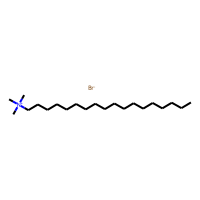
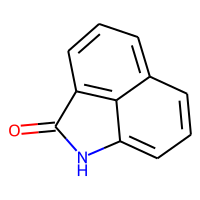
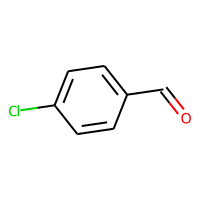
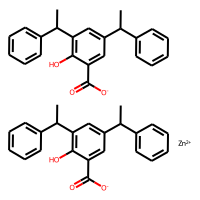
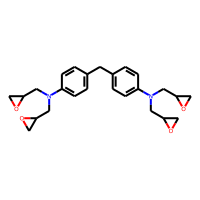
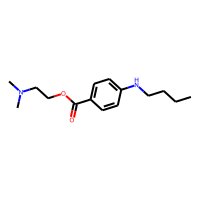
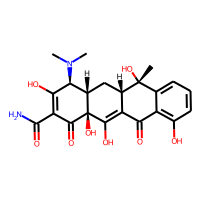
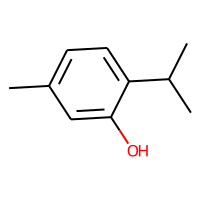
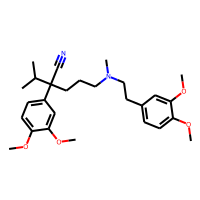
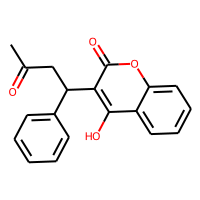

In [9]:
soldata

In [10]:
soldata.drop(soldata[soldata['MolWt'] > 700].index, inplace = True)

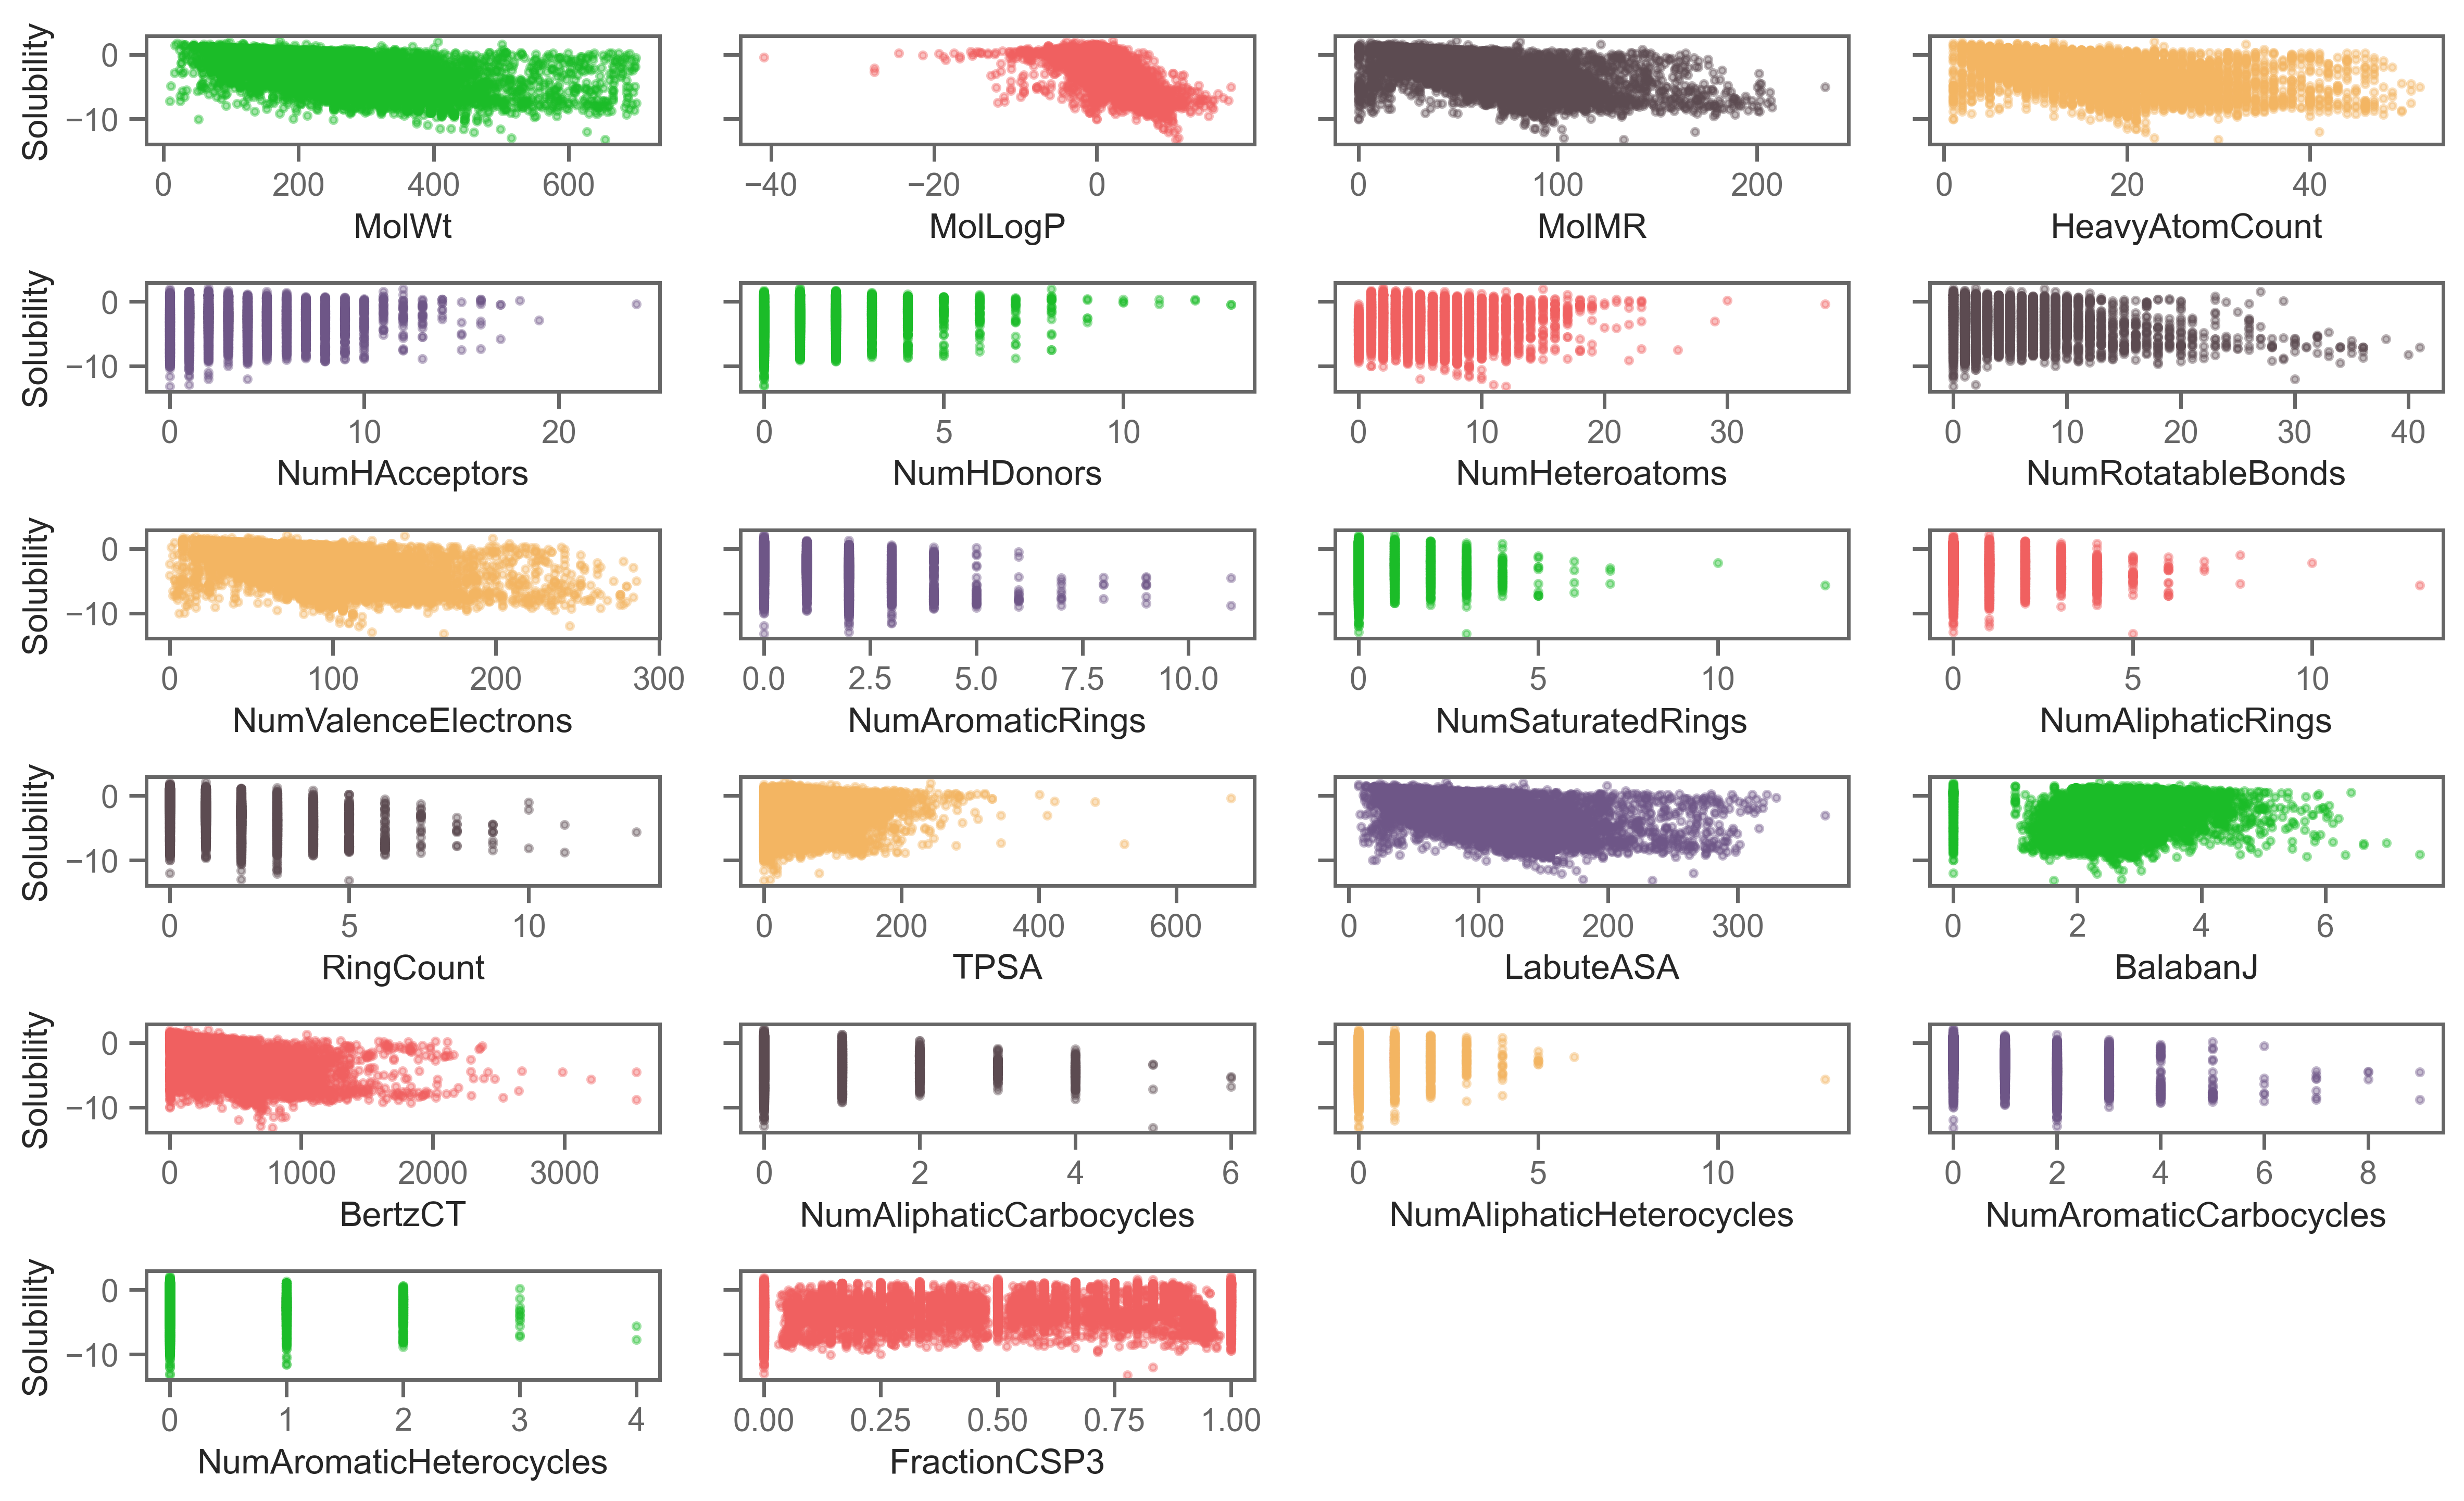

In [12]:
features_start_at = list(soldata.columns).index('MolWt')
feature_names = soldata.columns[features_start_at:]

fig, axs = plt.subplots(nrows=7, ncols=4, sharey=True, figsize=(12, 8), dpi=400)
axs = axs.flatten() # don't want to think about i/j
for i,n in enumerate(feature_names):
    ax = axs[i]
    ax.scatter(
        soldata[n], soldata.Solubility, 
        s = 6, alpha=0.4,
        color = f'C{i}') # add some color 
    if i % 4 == 0:
        ax.set_ylabel('Solubility')
    ax.set_xlabel(n)
# hide empty subplots
for i in range(len(feature_names), len(axs)):
    fig.delaxes(axs[i])
plt.tight_layout()
plt.show()

# Analysis and Visualiazation

In [13]:
def FPMorganNP(mol):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp,arr)
    return arr

In [14]:
fps = []
for mol in soldata['Mol']:
    fps.append(FPMorganNP(mol))
fps = np.array(fps)

In [15]:
len(fps)

9717

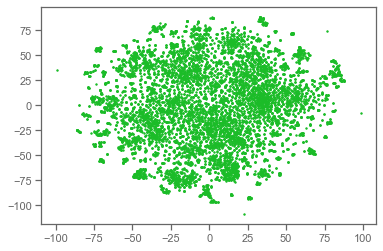

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE()
x = tsne.fit_transform(fps)

plt.figure()
plt.scatter(x[:,0],x[:,1],s=2)

In [17]:
from rdkit.ML.Cluster import Butina

fps = [AllChem.GetMorganFingerprintAsBitVect(mol,2) for mol in soldata['Mol']]

D = []
for i in range(1,len(fps)):
    sims = DataStructs.BulkTanimotoSimilarity(fps[i],list(fps[:i]))
    D.extend([1-a for a in sims])

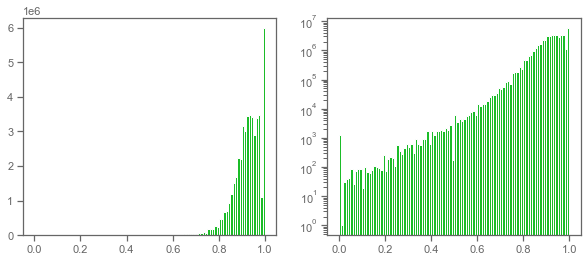

In [18]:
plt.figure(figsize=(10,4))

ax1 = plt.subplot(121)
ax1.hist(D, bins = 100, range=(0,1.0));
ax2 = plt.subplot(122)
ax2.hist(D, bins = 100, range=(0,1.0));
ax2.set_yscale('log')

In [19]:
import numpy as np

bins = [np.log10(x*1e-6) for x in [30,200]]
bins = [-100] + bins + [100]
soldata['bin'] = pd.cut(soldata.Solubility,bins=bins,labels=["Low","Medium","High"])

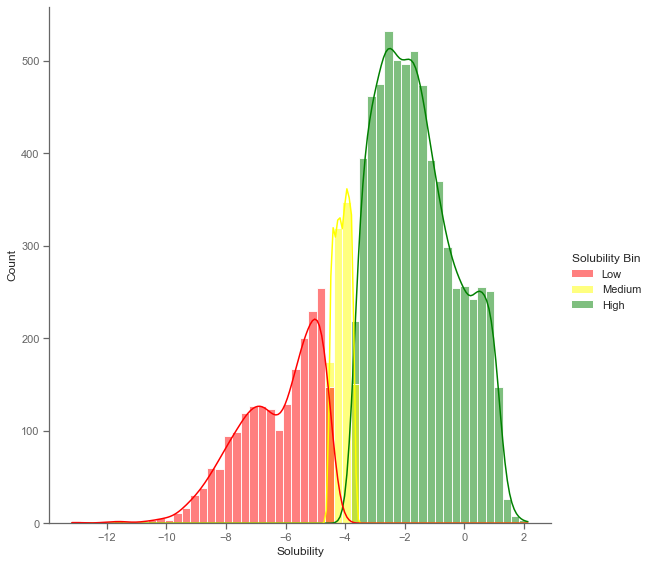

In [20]:
color_map_3 = {"Low":"red","Medium":"yellow","High":"green"}
g = sns.displot(x="Solubility",kind="hist",kde=True, height=8, hue="bin",data=soldata,palette=color_map_3)
g.fig.legends[0].set_title("Solubility Bin")

In [21]:
len(fps)

9717

In [25]:
soldata['bin'].value_counts()

High      6572
Low       2154
Medium     991
Name: bin, dtype: int64

In [26]:
desc_columns = soldata.select_dtypes([int,float]).columns[12:]
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(soldata[desc_columns])

In [27]:
tsne3 = TSNE()
tsne_crds3 = tsne.fit_transform(scaled_descriptors)

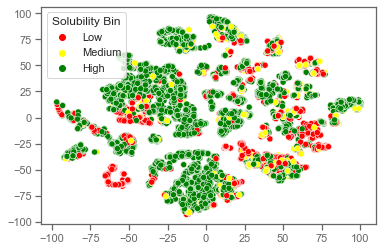

In [28]:
ax = sns.scatterplot(x=tsne_crds3[:,0],y=tsne_crds3[:,1],hue=soldata.bin,palette=color_map_3)
ax.get_legend().set_title("Solubility Bin")

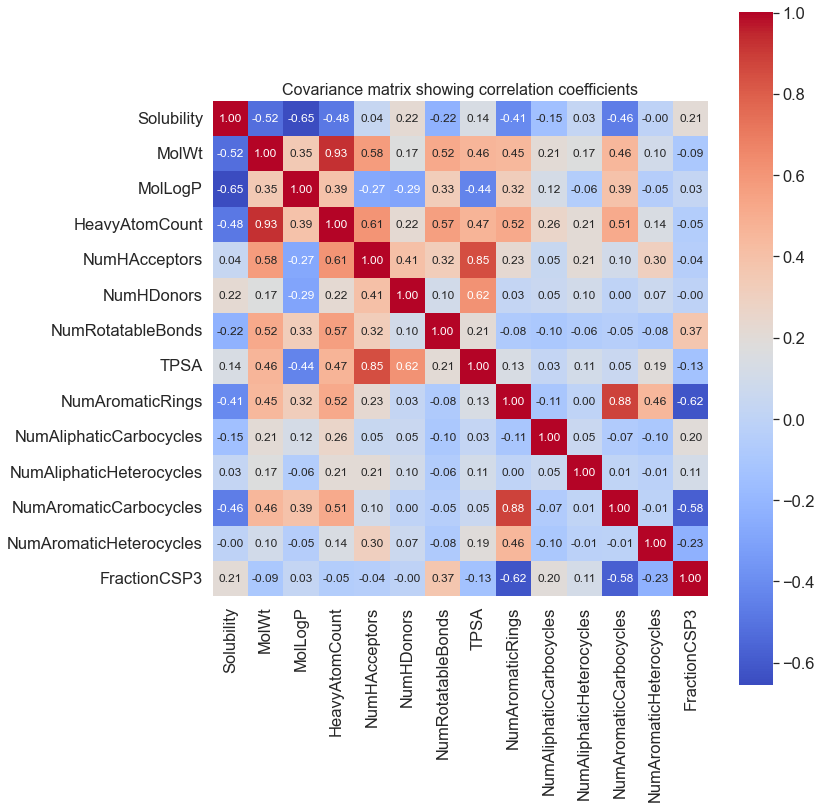

In [29]:
cols = ['Solubility','MolWt', 'MolLogP', 'HeavyAtomCount', 'NumHAcceptors', 
        'NumHDonors','NumRotatableBonds', 'TPSA', 'NumAromaticRings',
        'NumAliphaticCarbocycles','NumAliphaticHeterocycles',
       'NumAromaticCarbocycles','NumAromaticHeterocycles','FractionCSP3'] 

from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(soldata[cols].iloc[:,range(0,14)].values)

cov_mat=np.cov(X_std.T)
plt.figure(figsize=(12,12))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 16)
plt.tight_layout()
plt.show()

depending on the heatmap i have shortlisted few columns for model building

In [31]:
y = (soldata['Solubility'])
X = (soldata[['MolWt', 'MolLogP', 'HeavyAtomCount', 'NumHAcceptors', 
        'NumRotatableBonds', 'NumAromaticRings',
        'NumAliphaticCarbocycles',
       'NumAromaticCarbocycles','FractionCSP3']])

print(X.shape)
y.shape

(9717, 9)


(9717,)

In [32]:


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

In [33]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [34]:
xgb_r.fit(X_train, y_train)

[13:20:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [35]:
xgb_r.score(X_train,y_train)

0.8049707339749717

In [36]:
xgb_r.score(X_test,y_test)

0.70967654105302

In [37]:
pred = xgb_r.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  1.260481


In [39]:
MSE(y_test, pred)

1.5888128338948635

In [34]:
V = (soldata[['MolWt', 'MolLogP', 'HeavyAtomCount', 'NumHAcceptors', 
        'NumRotatableBonds', 'NumAromaticRings',
        'NumAliphaticCarbocycles',
       'NumAromaticCarbocycles','FractionCSP3']])


In [38]:
X_test

,MolWt,MolLogP,HeavyAtomCount,NumHAcceptors,NumRotatableBonds,NumAromaticRings,NumAliphaticCarbocycles,NumAromaticCarbocycles,FractionCSP3
2822,130.231,2.1951,9.0,1.0,5.0,0.0,0.0,0.0,1.000000
7653,291.435,3.4720,21.0,3.0,6.0,1.0,1.0,1.0,0.666667
268,282.206,-6.4972,16.0,6.0,2.0,1.0,0.0,1.0,0.000000
481,199.382,4.1120,14.0,1.0,10.0,0.0,0.0,0.0,1.000000
8756,107.156,1.1453,8.0,1.0,1.0,1.0,0.0,1.0,0.142857
...,...,...,...,...,...,...,...,...,...
6395,372.808,4.4059,26.0,6.0,6.0,3.0,0.0,2.0,0.210526
2672,104.174,1.2014,6.0,2.0,2.0,0.0,0.0,0.0,0.500000
8825,135.166,1.4714,10.0,2.0,1.0,1.0,0.0,1.0,0.125000
4885,149.284,1.3116,8.0,3.0,1.0,0.0,0.0,0.0,1.000000


# predictions

In [40]:
smiless = ['c5ccc(CC4CCN(Cc3nnc(c2cc1ccccc1[nH]2)[nH]3)CC4)cc5','COc4cc3cc(C(=O)NCCN2CCC(Cc1ccccc1)CC2)[nH]c3cc4OC','O=C(NCCN2CCC(Cc1ccccc1)CC2)c4cc3cc(O)ccc3[nH]4']

In [41]:
def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_HeavyAtomCount = rdkit.Chem.Lipinski.HeavyAtomCount(mol)
        desc_NumHAcceptors = rdkit.Chem.Lipinski.NumHAcceptors(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
        desc_NumAromaticRings = rdkit.Chem.Lipinski.NumAromaticRings(mol)
        desc_NumAliphaticCarbocycles = rdkit.Chem.Lipinski.NumAliphaticCarbocycles(mol)
        desc_NumAromaticCarbocycles = rdkit.Chem.Lipinski.NumAromaticCarbocycles(mol)
        desc_FractionCSP3 = rdkit.Chem.Lipinski.FractionCSP3(mol)
           
        row = np.array([desc_MolWt,desc_MolLogP,desc_HeavyAtomCount,desc_NumHAcceptors,
                        desc_NumRotatableBonds,desc_NumAromaticRings,desc_NumAliphaticCarbocycles,
                       desc_NumAromaticCarbocycles,desc_FractionCSP3])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds",'NumHAcceptors','NumRotatableBonds','NumAromaticRings','NumAliphaticCarbocycles',
                'NumAromaticCarbocycles','FractionCSP3']   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [42]:
trial = generate(smiless)

In [43]:
trial

,MolLogP,MolWt,NumRotatableBonds,NumHAcceptors,NumRotatableBonds,NumAromaticRings,NumAliphaticCarbocycles,NumAromaticCarbocycles,FractionCSP3
0,371.488,4.4077,28.0,3.0,5.0,4.0,0.0,2.0,0.304348
1,421.541,3.8696,31.0,4.0,8.0,3.0,0.0,2.0,0.400000
2,377.488,3.5580,28.0,3.0,6.0,3.0,0.0,2.0,0.347826


Prediction of those 3 molecules

In [44]:
xgb_r.predict(trial)

array([-4.4818735, -4.016648 , -4.0215116], dtype=float32)